In [54]:
# ==============================================================================
# CELL 1: PROJECT DEPENDENCIES
# Author: Artem Brezgin, Spanda Foundation (C) October 2025
# ==============================================================================
# This cell installs all the necessary Python libraries required for the entire
# Quant-Trika Causal PTI Lab. We use the '-q' flag for a quieter installation.
# ==============================================================================

!pip install -q gradio pandas numpy scipy scikit-learn matplotlib seaborn plotly pyyaml numba fpdf2 lightgbm

print("✅ All dependencies installed successfully (including LightGBM).")
print("Proceed to the next cell to mount Google Drive.")


✅ All dependencies installed successfully (including LightGBM).
Proceed to the next cell to mount Google Drive.


In [55]:
# ==============================================================================
# CELL 2: MOUNT GOOGLE DRIVE
# Author: Artem Brezgin, Spanda Foundation (C) October 2025
# ==============================================================================
# This cell mounts your personal Google Drive to the Colab environment.
# Mounting is essential for accessing datasets and persisting all outputs.
# ==============================================================================

from google.colab import drive

try:
    drive.mount('/content/drive')
    print("✅ Google Drive mounted successfully at /content/drive/MyDrive")
    print("You can now proceed to set up the project structure.")
except Exception as e:
    print(f"🔥 An error occurred while mounting Google Drive: {e}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Google Drive mounted successfully at /content/drive/MyDrive
You can now proceed to set up the project structure.


In [56]:
# ==============================================================================
# CELL 3: CREATE PROJECT DIRECTORY STRUCTURE
# Author: Artem Brezgin, Spanda Foundation (C) October 2025
# ==============================================================================
# This cell establishes the standardized folder structure for the PTI Lab on
# your Google Drive for organization and reproducibility.
# ==============================================================================

import os

# Define the root path for the lab in your Google Drive
DRIVE_ROOT = '/content/drive/MyDrive'
PROJECT_DIR = os.path.join(DRIVE_ROOT, 'qt_causal_pti_lab')

# Define the list of directories to be created
DIRECTORIES = [
    PROJECT_DIR,
    os.path.join(PROJECT_DIR, 'datasets', 'primes', 'raw'),
    os.path.join(PROJECT_DIR, 'datasets', 'primes', 'processed'),
    os.path.join(PROJECT_DIR, 'runs'),
    os.path.join(PROJECT_DIR, 'cache'),
    os.path.join(PROJECT_DIR, 'registry'),
    '/content/qt_causal_pti_lab_modules' # Directory for python modules
]

# --- Create the directories ---
try:
    print(f"Setting up project structure inside: {PROJECT_DIR}")
    for path in DIRECTORIES:
        os.makedirs(path, exist_ok=True)
        print(f"  -> Ensured directory exists: {path.replace(DRIVE_ROOT, '.../MyDrive')}")
    print("\n✅ Project directory structure is ready.")
except Exception as e:
    print(f"🔥 An error occurred while creating directories: {e}")



Setting up project structure inside: /content/drive/MyDrive/qt_causal_pti_lab
  -> Ensured directory exists: .../MyDrive/qt_causal_pti_lab
  -> Ensured directory exists: .../MyDrive/qt_causal_pti_lab/datasets/primes/raw
  -> Ensured directory exists: .../MyDrive/qt_causal_pti_lab/datasets/primes/processed
  -> Ensured directory exists: .../MyDrive/qt_causal_pti_lab/runs
  -> Ensured directory exists: .../MyDrive/qt_causal_pti_lab/cache
  -> Ensured directory exists: .../MyDrive/qt_causal_pti_lab/registry
  -> Ensured directory exists: /content/qt_causal_pti_lab_modules

✅ Project directory structure is ready.


In [57]:
# ==============================================================================
# CELL 4: PROJECT CONFIGURATION AND GLOBALS
# Author: Artem Brezgin, Spanda Foundation (C) October 2025
# ==============================================================================
# This cell defines global path constants and creates a default configuration
# file (`config.yaml`) in the project's root directory.
# ==============================================================================

import os
import yaml

# --- 1. Define Global Path Constants ---
DRIVE_ROOT = '/content/drive/MyDrive'
PROJECT_DIR = os.path.join(DRIVE_ROOT, 'qt_causal_pti_lab')
CONFIG_PATH = os.path.join(PROJECT_DIR, 'config.yaml')
MODULE_PATH = '/content/qt_causal_pti_lab_modules'

# --- 2. Define the Default Configuration Structure ---
default_config = {
    'run_settings': {
        'tag': 'safe_patched_run',
        'seed': 42,
        'domain': 'primes'
    },
    'data': {
        'domain_adapter': 'primes',
        'raw_path': os.path.join(PROJECT_DIR, 'datasets', 'primes', 'raw', 'primes_up_to_1M.csv'),
        'processed_path': os.path.join(PROJECT_DIR, 'datasets', 'primes', 'processed', 'primes_1M_pp.csv'),
    },
    'validation': {
        'strategy': 'temporal_split_with_gap',
        'splits': {
            'train_end': 0.6,
            'val_end': 0.8,
            'test_end': 1.0,
            'gap_size': 500
        }
    },
    'pti_hyperparameters': {
        'theta_W': 100,
        'kq_W': 50,
        'kq_alpha': 0.1,
    },
    'reporting': {
        'dpi': 300
    }
}

# --- 3. Write the Configuration File to Google Drive ---
try:
    if not os.path.exists(CONFIG_PATH):
        with open(CONFIG_PATH, 'w') as f:
            yaml.dump(default_config, f, sort_keys=False, indent=2)
        print(f"✅ Default configuration file created at: {CONFIG_PATH.replace(DRIVE_ROOT, '.../MyDrive')}")
    else:
        print(f"📋 Configuration file already exists. Skipping creation.")

    with open(CONFIG_PATH, 'r') as f:
        config = yaml.safe_load(f)
    print("\n--- Current Configuration ---")
    print(yaml.dump(config, sort_keys=False, indent=2))
    print("-----------------------------")

except Exception as e:
    print(f"🔥 An error occurred during configuration setup: {e}")



📋 Configuration file already exists. Skipping creation.

--- Current Configuration ---
run_settings:
  tag: initial_test
  seed: 42
  domain: primes
data:
  domain_adapter: primes
  raw_path: /content/drive/MyDrive/qt_causal_pti_lab/datasets/primes/raw/primes_up_to_1M.csv
  processed_path: /content/drive/MyDrive/qt_causal_pti_lab/datasets/primes/processed/primes_1M_pp.csv
validation:
  strategy: walk_forward
  splits:
    train_end: 0.6
    val_end: 0.8
    test_end: 1.0
pti_hyperparameters:
  mode: PTI-1
  theta_W: 100
  kq_W: 50
  kq_alpha: 0.1
  composition_weights:
    w_theta: 1.0
    w_kq_laplacian: 1.0
    w_kq_field: -1.0
    w_rigidity: -1.0
ablations:
  run_ablations: true
  theta_only: true
  kq_stack_only: true
  rigidity_only: true
  full_pti: true
reporting:
  export_pdf: true
  export_html: false
  dpi: 300

-----------------------------


In [65]:
# ==============================================================================
# CELL 5: CREATE I/O MODULE (lab_io.py)
# Author: Artem Brezgin, Spanda Foundation (C) October 2025
# ==============================================================================
# This module handles all file input/output operations for the lab.
# ==============================================================================

import os
import yaml
import json
import pandas as pd
from datetime import datetime

MODULE_PATH = '/content/qt_causal_pti_lab_modules'
IO_MODULE_PATH = os.path.join(MODULE_PATH, 'lab_io.py')

module_content = """
import os
import yaml
import json
import pandas as pd
from datetime import datetime

def load_config(path):
    \"\"\"Loads a YAML configuration file.\"\"\"
    with open(path, 'r') as f:
        return yaml.safe_load(f)

def setup_run_environment(config):
    \"\"\"Creates a directory structure for a new run.\"\"\"
    base_run_dir = '/content/drive/MyDrive/qt_causal_pti_lab/runs'
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    domain = config['run_settings']['domain']
    tag = config['run_settings']['tag']
    run_name = f"{timestamp}_{domain}_{tag}"
    run_dir = os.path.join(base_run_dir, run_name)

    artifacts_dir = os.path.join(run_dir, 'artifacts')
    curves_dir = os.path.join(artifacts_dir, 'curves')

    for path in [run_dir, artifacts_dir, curves_dir]:
        os.makedirs(path, exist_ok=True)

    config_snapshot_path = os.path.join(run_dir, 'config.yaml')
    with open(config_snapshot_path, 'w') as f:
        yaml.dump(config, f)

    return run_dir, artifacts_dir, curves_dir

def save_json(data, path):
    \"\"\"Saves a dictionary to a JSON file.\"\"\"
    with open(path, 'w') as f:
        json.dump(data, f, indent=4)
"""

with open(IO_MODULE_PATH, 'w') as f:
    f.write(module_content)

print(f"✅ I/O module successfully written to: {IO_MODULE_PATH}")


✅ I/O module successfully written to: /content/qt_causal_pti_lab_modules/lab_io.py


In [66]:
# ==============================================================================
# CELL 6: CREATE DOMAIN ADAPTER MODULE (adapters.py)
# Author: Artem Brezgin, Spanda Foundation (C) October 2025
# ==============================================================================
# This module provides a factory for creating domain-specific data adapters.
# ==============================================================================
import os

MODULE_PATH = '/content/qt_causal_pti_lab_modules'
ADAPTERS_MODULE_PATH = os.path.join(MODULE_PATH, 'adapters.py')

module_content = """
import os
import pandas as pd
import numpy as np

class BaseAdapter:
    \"\"\"Abstract base class for all domain adapters.\"\"\"
    def __init__(self, data_config):
        self.config = data_config
        self.raw_path = self.config['raw_path']
        self.processed_path = self.config['processed_path']

    def load_and_process(self):
        raise NotImplementedError("Each adapter must implement load_and_process.")

class PrimesAdapter(BaseAdapter):
    \"\"\"Adapter for handling prime number event data.\"\"\"
    def _generate_primes_file(self, limit=100000):
        print(f"Generating primes up to {limit}...")
        is_prime = [True] * (limit + 1)
        is_prime[0] = is_prime[1] = False
        for p in range(2, int(np.sqrt(limit)) + 1):
            if is_prime[p]:
                for multiple in range(p*p, limit + 1, p):
                    is_prime[multiple] = False
        primes = [p for p, is_p in enumerate(is_prime) if is_p]
        df = pd.DataFrame(primes, columns=['prime'])
        os.makedirs(os.path.dirname(self.raw_path), exist_ok=True)
        df.to_csv(self.raw_path, index=False)
        print(f"  -> Saved {len(primes)} primes to {self.raw_path}")

    def _convert_to_point_process(self):
        print("Converting primes to point process format...")
        primes_df = pd.read_csv(self.raw_path)
        max_val = primes_df['prime'].max()

        df = pd.DataFrame({'integer': np.arange(1, max_val + 1)})
        df['event'] = 0
        df.loc[df['integer'].isin(primes_df['prime']), 'event'] = 1

        x = np.maximum(df['integer'].values, 3)
        df['baseline_intensity'] = 1.0 / np.log(x)

        return df

    def load_and_process(self):
        if not os.path.exists(self.raw_path):
            self._generate_primes_file(limit=100000)

        point_process_df = self._convert_to_point_process()
        return point_process_df

def get_adapter(adapter_name, data_config):
    \"\"\"Factory function to get the correct adapter instance.\"\"\"
    adapters = {'primes': PrimesAdapter}
    AdapterClass = adapters.get(adapter_name)
    if not AdapterClass:
        raise ValueError(f"Unknown domain adapter: {adapter_name}")
    return AdapterClass(data_config)
"""

with open(ADAPTERS_MODULE_PATH, 'w') as f:
    f.write(module_content)

print(f"✅ Domain Adapters module successfully written to: {ADAPTERS_MODULE_PATH}")


✅ Domain Adapters module successfully written to: /content/qt_causal_pti_lab_modules/adapters.py


In [110]:
# ==============================================================================
# CELL 7: PTI CAUSAL ENGINE MODULE (pti.py)
# Author: Artem Brezgin, Spanda Foundation (C) October 2025
# ==============================================================================
# This module contains the core PTI logic.
# The rigidity calculation has been rewritten to be strictly causal.
# ==============================================================================
import os
import pandas as pd
import numpy as np
import numba

MODULE_PATH = '/content/qt_causal_pti_lab_modules'
PTI_MODULE_PATH = os.path.join(MODULE_PATH, 'pti.py')

module_content = """
import numpy as np
import pandas as pd
import numba

# --- Numba-compatible helper function for linear regression ---
@numba.jit(nopython=True)
def _linear_fit(x, y):
    # Computes the slope and intercept of a simple linear regression.
    n = len(x)
    if n < 2:
        return 0.0, np.mean(y) if n > 0 else 0.0

    x_mean = np.mean(x)
    y_mean = np.mean(y)

    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean) ** 2)

    if denominator == 0:
        slope = 0.0
    else:
        slope = numerator / denominator

    intercept = y_mean - slope * x_mean
    return slope, intercept

# --- Hurst Exponent Calculation (Optimized) --
@numba.jit(nopython=True)
def _hurst(series):
    # Internal function to calculate the Hurst Exponent using DFA.
    n = len(series)
    if n < 20:
        return 0.5

    y = np.cumsum(series - np.mean(series))

    scales = np.logspace(np.log10(10), np.log10(n / 4), num=20).astype(np.int32)
    scales = np.unique(scales)
    fluctuations = np.zeros(len(scales))

    for i, scale in enumerate(scales):
        if scale == 0: continue

        segments = n // scale
        if segments == 0: continue

        rms = np.zeros(segments)
        for j in range(segments):
            idx_start = j * scale
            idx_end = idx_start + scale
            segment = y[idx_start:idx_end]
            x_range = np.arange(scale)
            slope, intercept = _linear_fit(x_range, segment)
            fit = slope * x_range + intercept
            rms[j] = np.sqrt(np.mean((segment - fit) ** 2))

        fluctuations[i] = np.mean(rms)

    valid_fluctuations = fluctuations[fluctuations > 0]
    valid_scales = scales[:len(valid_fluctuations)]

    if len(valid_fluctuations) < 2:
        return 0.5

    log_scales = np.log(valid_scales)
    log_fluctuations = np.log(valid_fluctuations)
    hurst_exp, _ = _linear_fit(log_scales, log_fluctuations)
    return hurst_exp

class PTIEngine:
    \"\"\"Core engine for computing PTI features.\"\"\"
    def __init__(self, config):
        self.config = config
        self.params = config['pti_hyperparameters']

    def _martingale_scale(self, events, lambda_base, alpha=0.01):
        # The scaling factor 'a' is based on a shifted ratio to ensure causality.
        N = events.cumsum().astype(float)
        L = lambda_base.cumsum().astype(float)
        eps = 1e-6
        ratio = (N + eps) / (L + eps)
        a = ratio.shift(1, fill_value=1.0).ewm(alpha=alpha, adjust=False).mean()
        lambda_tilde = a * lambda_base
        return lambda_tilde.clip(upper=0.3)

    def _compute_theta(self, events, lambda_tilde, window):
        # Computes Martingale residual using calibrated intensity.
        N = events.cumsum()
        Lambda = lambda_tilde.cumsum()
        ontological_debt = (N - Lambda).shift(1, fill_value=0)
        return ontological_debt - ontological_debt.shift(window, fill_value=0)

    def _compute_kq_stack(self, innovations, alpha):
        # Computes KQ stack using martingale innovations.
        kq_field = innovations.shift(1, fill_value=0).ewm(alpha=alpha, adjust=False).mean()
        kq_lagl1 = kq_field.shift(1, fill_value=0)
        kq_lagl2 = kq_field.shift(2, fill_value=0)
        kq_laplacian = kq_field - 2.0 * kq_lagl1 + kq_lagl2
        return kq_field, kq_laplacian

    def _compute_rigidity(self, data):
        \"\"\"
        Computes the Fractal Rigidity feature using a strictly causal approach.
        The rigidity for interval [t_j-2, t_j-1) is based on history before t_j-2.
        \"\"\"
        event_indices = np.flatnonzero(data['event'].values)
        rigidity_values = np.full(len(data), 0.5) # Default to 0.5

        # We need at least 22 events for a history of 20 inter-arrivals.
        if len(event_indices) > 21:
            for j in range(21, len(event_indices)):
                # History is strictly events before event j-1 (i.e., up to j-2).
                # np.diff(event_indices[:j-1]) gives j-2 inter-arrival times.
                inter_arrivals_past = np.diff(event_indices[:j-1])

                rigidity = 0.5 # Default value if history is too short
                if len(inter_arrivals_past) >= 20:
                    hurst_val = _hurst(inter_arrivals_past.astype(np.float64))
                    rigidity = np.abs(hurst_val - 0.5)

                # Assign this rigidity to the interval *following* the history,
                # which is the interval from event j-2 up to (but not including) event j-1.
                start_idx = event_indices[j-2]
                end_idx = event_indices[j-1]
                rigidity_values[start_idx:end_idx] = rigidity

            # Forward fill the last computed value to the end of the series.
            last_computed_end_idx = event_indices[-2]
            last_computed_val = rigidity_values[last_computed_end_idx-1]
            rigidity_values[last_computed_end_idx:] = last_computed_val

        return pd.Series(rigidity_values, index=data.index)

    def compute_features(self, data):
        \"\"\"Computes all PTI features causally.\"\"\"
        print(f"  Computing PTI raw features on {len(data)} samples...")
        features = pd.DataFrame(index=data.index)

        lambda_alpha = self.params.get('lambda_alpha', 0.01)
        lambda_tilde = self._martingale_scale(data['event'], data['baseline_intensity'], alpha=lambda_alpha)
        innovations = data['event'] - lambda_tilde

        features['theta'] = self._compute_theta(data['event'], lambda_tilde, self.params['theta_W'])
        kq_field, kq_laplacian = self._compute_kq_stack(innovations, self.params['kq_alpha'])
        features['kq_field'] = kq_field
        features['kq_laplacian'] = kq_laplacian

        features['rigidity'] = self._compute_rigidity(data)

        return features.fillna(0)
"""

with open(PTI_MODULE_PATH, 'w') as f:
    f.write(module_content)

print(f"✅ PTI Causal Engine module successfully written to: {PTI_MODULE_PATH}")
print("   CRITICAL PATCHES APPLIED: Rigidity and Martingale Scale are now strictly causal.")



✅ PTI Causal Engine module successfully written to: /content/qt_causal_pti_lab_modules/pti.py
   CRITICAL PATCHES APPLIED: Rigidity and Martingale Scale are now strictly causal.


In [111]:
# ==============================================================================
# NEW CELL: HELPER MODULES FOR SAFE EXECUTION
# Author: Artem Brezgin, Spanda Foundation (C) October 2025
# ==============================================================================
# This cell creates all necessary helper modules in the specified directory.
# It includes the final patches for feature_engineering_safe.py to prevent
# data leakage and errors. Run this cell once before the main pipeline.
# ==============================================================================
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.isotonic import IsotonicRegression
from scipy.optimize import curve_fit

MODULE_PATH = '/content/qt_causal_pti_lab_modules'
os.makedirs(MODULE_PATH, exist_ok=True)

# --- 1. Create feature_engineering_safe.py (with CRITICAL PATCH) ---
feature_engineering_content = """
import pandas as pd
import numpy as np

def rolling_past(s: pd.Series, win: int, fun="mean", min_periods=1):
    \"\"\"Calculates a rolling function using only past data via s.shift(1).\"\"\"
    s_lag = s.shift(1)
    roll = getattr(s_lag.rolling(window=win, min_periods=min_periods), fun)()
    return roll

def build_temporal_features(df: pd.DataFrame, event_col="event"):
    \"\"\"
    Creates a set of temporal features, ensuring no data leakage.
    CRITICAL PATCH: 'dist_last_event' is now strictly causal and uses numeric index.
    \"\"\"
    out = pd.DataFrame(index=df.index)

    # Causal distance since last event (numeric index based)
    event_mask = df[event_col] == 1
    last_event_idx = pd.Series(df.index, index=df.index).where(event_mask)
    # Shift event indices BEFORE forward-filling to ensure we only look at past events.
    last_event_idx_lagged = last_event_idx.shift(1).ffill()

    # Calculate distance using numeric indices. No .dt accessor needed.
    dist = (pd.Series(df.index, index=df.index) - last_event_idx_lagged).fillna(0)

    # No extra shift is needed as causality is handled by the logic above.
    out["dist_last_event"] = dist

    # Causal event counters in past windows
    for w in [10, 50, 200]:
        out[f"past_count_{w}"] = rolling_past(df[event_col].astype(float), w, "sum")
        out[f"past_rate_{w}"]  = rolling_past(df[event_col].astype(float), w, "mean")

    return out.fillna(0)
"""
with open(os.path.join(MODULE_PATH, 'feature_engineering_safe.py'), 'w') as f:
    f.write(feature_engineering_content)
print(f"✅ Safe Feature Engineering module successfully written (with patch).")

# --- 2. Create lab_utils_safe.py ---
lab_utils_content = """
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.isotonic import IsotonicRegression

class RobustScalerByTrain:
    \"\"\"Fits only on train data, transforms any split using median/IQR.\"\"\"
    def __init__(self, clip=6.0):
        self.clip = clip
        self.median_ = None
        self.iqr_ = None

    def fit(self, df_train: pd.DataFrame, cols):
        self.median_ = df_train[cols].median()
        iqr = df_train[cols].quantile(0.75) - df_train[cols].quantile(0.25)
        self.iqr_ = iqr.replace(0, 1.0) # Avoid division by zero
        return self

    def transform(self, df: pd.DataFrame, cols):
        z = (df[cols] - self.median_) / self.iqr_
        if self.clip is not None:
            z = z.clip(lower=-self.clip, upper=self.clip)
        return z.add_suffix("_z")

class PTIComposer:
    \"\"\"Learns PTI composition weights using only TRAIN data.\"\"\"
    def __init__(self, alpha=1.0):
        self.model_ = LogisticRegression(C=1/alpha, penalty='l2', solver='liblinear')

    def fit(self, X_train: pd.DataFrame, y_train: np.ndarray):
        self.model_.fit(X_train, y_train)
        return self

    def transform(self, X: pd.DataFrame):
        # Use decision_function for raw scores, not predict_proba
        s = self.model_.decision_function(X)
        return pd.Series(s, index=X.index, name="pti_score_raw")

class ValOnlyIsotonic:
    \"\"\"Fits an Isotonic Regression calibrator on the validation set only.\"\"\"
    def __init__(self, y_min=0.0, y_max=1.0):
        self.iso_ = IsotonicRegression(y_min=y_min, y_max=y_max, out_of_bounds="clip")

    def fit(self, y_val, s_val):
        self.iso_.fit(s_val, y_val)
        return self

    def transform(self, s):
        return self.iso_.transform(s)
"""
with open(os.path.join(MODULE_PATH, 'lab_utils_safe.py'), 'w') as f:
    f.write(lab_utils_content)
print(f"✅ Safe Lab Utilities module successfully written.")

# --- 3. Create leakage_guard.py ---
leakage_guard_content = """
import numpy as np
from sklearn.metrics import roc_auc_score

def leakage_checks(X_tr, y_tr, X_va, y_va, s_tr, s_va, feature_names):
    \"\"\"Performs a series of checks to detect potential data leakage.\"\"\"
    # Check for binary features that are almost identical to the label
    for i, c in enumerate(feature_names):
        try:
            x = X_tr.iloc[:, i].values
            if np.all((x==0)|(x==1)):
                match = (x == y_tr.values).mean()
                if match > 0.99 or match < 0.01:
                    raise RuntimeError(f"[LEAKAGE] Feature '{c}' matches label {match:.2%} on train.")
        except IndexError:
            # Handle cases where column might not exist after transformations
            pass

    # Heuristic check for a large AUC gap between train and validation
    try:
        auc_tr = roc_auc_score(y_tr, s_tr)
        auc_va = roc_auc_score(y_va, s_va)
        if auc_tr - auc_va > 0.15 and auc_tr > 0.9:
            print(f"⚠️  Suspicious AUC gap: train AUC {auc_tr:.3f} >> val AUC {auc_va:.3f}")
    except Exception:
        pass # roc_auc_score might fail with single class
"""
with open(os.path.join(MODULE_PATH, 'leakage_guard.py'), 'w') as f:
    f.write(leakage_guard_content)
print(f"✅ Data Leakage Guard module successfully written.")

# --- 4. Create runner.py ---
runner_content = """
import pandas as pd
from pti import PTIEngine
from feature_engineering_safe import build_temporal_features
from lab_utils_safe import RobustScalerByTrain, PTIComposer
from ensemble import train_ensemble
from leakage_guard import leakage_checks

class SafeWalkForwardRunner:
    \"\"\"Orchestrates a strictly causal walk-forward validation process.\"\"\"
    def __init__(self, config):
        self.config = config
        self.pti_engine = PTIEngine(config)

    def _build_split_features(self, df):
        # Build features for a single data split.
        pti = self.pti_engine.compute_features(df)
        adv = build_temporal_features(df)
        out = pd.concat([pti, adv, df['event']], axis=1)
        return out

    def run(self, train_df, val_df, test_df):
        print("  Computing features separately for each split to prevent leakage...")
        tr_raw = self._build_split_features(train_df)
        va_raw = self._build_split_features(val_df)
        te_raw = self._build_split_features(test_df)

        print("  Scaling features (fitting on train only)...")
        raw_cols = [c for c in tr_raw.columns if c != 'event']
        scaler = RobustScalerByTrain().fit(tr_raw, raw_cols)

        tr_z = scaler.transform(tr_raw, raw_cols)
        va_z = scaler.transform(va_raw, raw_cols)
        te_z = scaler.transform(te_raw, raw_cols)

        print("  Learning PTI composition weights (fitting on train only)...")
        pti_cols = [c for c in tr_z.columns if c.startswith(('theta_z','kq_field_z','kq_laplacian_z','rigidity_z'))]
        composer = PTIComposer().fit(tr_z[pti_cols], tr_raw['event'])

        tr_raw['pti_score_raw'] = composer.transform(tr_z[pti_cols])
        va_raw['pti_score_raw'] = composer.transform(va_z[pti_cols])
        te_raw['pti_score_raw'] = composer.transform(te_z[pti_cols])

        print("  Training ensemble model...")
        # Ensure 'event' column is present for training
        tr_z_full = tr_z.join(tr_raw['event'])
        va_z_full = va_z.join(va_raw['event'])
        blender = train_ensemble(tr_z_full, va_z_full, use_lightgbm=True)

        print("  Generating final blended predictions...")
        def _blend(df_raw, df_z):
            # The blender expects scaled features (df_z) and raw PTI scores (df_raw)
            return blender.predict_blend(df_z, df_raw['pti_score_raw'].values)

        tr_raw['pti_score'] = _blend(tr_raw, tr_z)
        va_raw['pti_score'] = _blend(va_raw, va_z)
        te_raw['pti_score'] = _blend(te_raw, te_z)

        print("  Running final leakage checks...")
        leakage_checks(
            tr_z, tr_raw['event'],
            va_z, va_raw['event'],
            tr_raw['pti_score'], va_raw['pti_score'],
            feature_names=tr_z.columns.tolist()
        )

        return tr_raw, va_raw, te_raw
"""
with open(os.path.join(MODULE_PATH, 'runner.py'), 'w') as f:
    f.write(runner_content)
print("✅ Safe Walk-Forward Runner module successfully written.")


# --- 5. Create metrics.py ---
metrics_content = """
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score, average_precision_score, brier_score_loss, roc_curve
from lab_utils_safe import ValOnlyIsotonic
from scipy.optimize import curve_fit

def _omori(t, K, c, p):
    return K / np.power(t + c, p)

def _fit_omori(time_counts, min_p=0.8, max_p=2.5):
    if time_counts is None or len(time_counts) < 3:
        return {'comment': 'Not enough aftershock data to fit.'}
    x = time_counts['t_since_trigger'].values
    y = time_counts['count'].values
    p0 = [max(y) * (min(x) + 1.0), np.median(x) * 0.1, 1.1]
    bounds = ([1e-6, 1e-6, min_p], [1e12, 1e9, max_p])
    try:
        K, c, p = curve_fit(_omori, x, y, p0=p0, bounds=bounds, maxfev=5000)[0]
        return {'K': float(K), 'c': float(c), 'p': float(p)}
    except Exception as e:
        return {'comment': f'Omori fit failed: {e}'}

class MetricsCalculator:
    def __init__(self):
        self.calibrator = ValOnlyIsotonic()
        self.polarity_flipped = False

    def _choose_threshold(self, y_true, y_score):
        fpr, tpr, thr = roc_curve(y_true, y_score)
        return thr[np.argmax(tpr - fpr)] # Youden index

    def _psi(self, base, target, buckets=10):
        try:
            cuts = np.percentile(base, np.linspace(0, 100, buckets + 1))
            cuts[0], cuts[-1] = -np.inf, np.inf
            b = pd.cut(base, bins=cuts, right=False).value_counts(normalize=True).sort_index().replace(0, 1e-4)
            t = pd.cut(target, bins=cuts, right=False).value_counts(normalize=True).sort_index().reindex(b.index).fillna(1e-4)
            return ((t - b) * np.log(t / b)).sum()
        except Exception:
            return np.nan

    def _class_metrics(self, y, s, p=None):
        return {
            'roc_auc': roc_auc_score(y, s),
            'pr_auc': average_precision_score(y, s),
            'brier_score': brier_score_loss(y, p) if p is not None else np.nan
        }

    def calculate_all(self, tr, va, te):
        # Correct polarity based on validation set performance
        if roc_auc_score(va['event'], va['pti_score']) < 0.5:
            self.polarity_flipped = True
            for df in (tr, va, te): df['pti_score'] = -df['pti_score']

        # Fit calibrator on validation set ONLY
        self.calibrator.fit(va['event'], va['pti_score'])
        for df in (tr, va, te):
            df['calibrated_proba'] = self.calibrator.transform(df['pti_score'])

        # Choose threshold from validation set
        thr = self._choose_threshold(va['event'], va['pti_score'])

        # PSI on raw and calibrated scores
        psi_raw = self._psi(tr['pti_score'], te['pti_score'])
        psi_cal = self._psi(tr['calibrated_proba'], te['calibrated_proba'])

        # Omori law analysis on test set
        preds = (te['pti_score'] > thr).astype(int)
        triggers = np.where((preds == 1) & (preds.shift(1, fill_value=0) == 0))[0]
        time_counts = None
        if len(triggers):
            after_times = [t for idx in triggers for t in np.where(te['event'].iloc[idx+1:] == 1)[0] + 1]
            if after_times:
                time_counts = pd.Series(after_times).value_counts().sort_index().reset_index()
                time_counts.columns = ['t_since_trigger', 'count']

        omori = _fit_omori(time_counts)

        return {
            'train': self._class_metrics(tr['event'], tr['pti_score'], tr['calibrated_proba']),
            'val': self._class_metrics(va['event'], va['pti_score'], va['calibrated_proba']),
            'test': self._class_metrics(te['event'], te['pti_score'], te['calibrated_proba']),
            'drift': {'psi_raw_score': psi_raw, 'psi_calibrated': psi_cal},
            'omori': omori,
            'threshold_used': float(thr),
            'polarity_flipped': bool(self.polarity_flipped)
        }
"""
with open(os.path.join(MODULE_PATH, 'metrics.py'), 'w') as f:
    f.write(metrics_content)
print("✅ Safe Metrics module successfully written.")

# --- 6. Create ensemble.py (Patched) ---
ensemble_content = """
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

try:
    import lightgbm as lgb
    LIGHTGBM_AVAILABLE = True
except ImportError:
    LIGHTGBM_AVAILABLE = False

class EnsembleBlender:
    def __init__(self, use_lightgbm=True):
        self.use_lightgbm = use_lightgbm and LIGHTGBM_AVAILABLE
        self.gbm_model = None
        self.blend_model = None
        self.feature_cols = None

    def train(self, train_features_z, val_features_z):
        if not self.use_lightgbm:
            print("  LightGBM not available, skipping ensemble.")
            return self

        # CRITICAL: Use only scaled features (_z) for training GBM
        self.feature_cols = [c for c in train_features_z.columns if c.endswith('_z')]
        X_train = train_features_z[self.feature_cols].fillna(0).values
        y_train = train_features_z['event'].values
        X_val = val_features_z[self.feature_cols].fillna(0).values
        y_val = val_features_z['event'].values

        # LightGBM training
        params = {'objective': 'binary', 'metric': 'auc', 'is_unbalance': True, 'verbosity': -1}
        dtrain = lgb.Dataset(X_train, label=y_train)
        dval = lgb.Dataset(X_val, label=y_val, reference=dtrain)
        self.gbm_model = lgb.train(
            params, dtrain, num_boost_round=100,
            valid_sets=[dval], callbacks=[lgb.early_stopping(5, verbose=False)]
        )

        # Train blender on validation set predictions
        val_pred_gbm = self.gbm_model.predict(X_val, num_iteration=self.gbm_model.best_iteration)
        # We need pti_score_raw here, which isn't in features_z.
        # This will be passed to predict_blend, so we'll fit the blender there on-the-fly.
        # For now, we just have the GBM.
        return self

    def predict_blend(self, features_z, pti_scores_raw):
        if not self.use_lightgbm or self.gbm_model is None:
            return pti_scores_raw # Fallback to raw PTI score

        X = features_z[self.feature_cols].fillna(0).values
        gbm_preds = self.gbm_model.predict(X, num_iteration=self.gbm_model.best_iteration)

        # Simple average blend if no blend model is trained, or apply a learned model.
        # For simplicity in this pipeline, we will use a fixed-weight blend.
        # A more advanced version would train a blender on validation predictions.
        return 0.5 * pti_scores_raw + 0.5 * gbm_preds

def train_ensemble(train_features_z, val_features_z, use_lightgbm=True):
    blender = EnsembleBlender(use_lightgbm=use_lightgbm)
    blender.train(train_features_z, val_features_z)
    return blender
"""
with open(os.path.join(MODULE_PATH, 'ensemble.py'), 'w') as f:
    f.write(ensemble_content)
print("✅ Ensemble module successfully written (with patch).")



✅ Safe Feature Engineering module successfully written (with patch).
✅ Safe Lab Utilities module successfully written.
✅ Data Leakage Guard module successfully written.
✅ Safe Walk-Forward Runner module successfully written.
✅ Safe Metrics module successfully written.
✅ Ensemble module successfully written (with patch).


In [112]:
# ==============================================================================
# CELL 9: ENSEMBLE MODULE (ensemble.py)
# Author: Artem Brezgin, Spanda Foundation (C) October 2025
# ==============================================================================
# PATCH: Made feature selection for GBM more robust to prevent KeyErrors.
# ==============================================================================

import os

MODULE_PATH = '/content/qt_causal_pti_lab_modules'
ENSEMBLE_PATH = os.path.join(MODULE_PATH, 'ensemble.py')

module_content = """
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression

class EnsembleBlender:
    \"\"\"Blends PTI scores with LightGBM predictions.\"\"\"
    def __init__(self, use_lightgbm=True):
        self.use_lightgbm = use_lightgbm
        self.gbm_model = None
        self.blend_model = None
        self.feature_cols = None

    def train_gbm(self, train_features, val_features):
        exclude_cols = ['event', 'pti_score', 'pti_score_raw', 'calibrated_proba', 'prediction']

        # PATCH: Explicitly select only z-score columns for the GBM model
        # to ensure consistency between training and prediction stages.
        z_cols = [c for c in train_features.columns if c.endswith('_z')]
        self.feature_cols = [c for c in z_cols if c not in exclude_cols]

        print(f"  Training GBM on {len(self.feature_cols)} z-scored features.")

        X_train = train_features[self.feature_cols].fillna(0).values
        y_train = train_features['event'].values
        X_val = val_features[self.feature_cols].fillna(0).values
        y_val = val_features['event'].values

        params = {'objective': 'binary', 'metric': 'auc', 'is_unbalance': True, 'verbosity': -1, 'seed': 42}
        dtrain = lgb.Dataset(X_train, label=y_train)
        dval = lgb.Dataset(X_val, label=y_val, reference=dtrain)

        self.gbm_model = lgb.train(params, dtrain, num_boost_round=1000, valid_sets=[dval], callbacks=[lgb.early_stopping(100, verbose=False)])
        return self.gbm_model

    def train_blend(self, val_features, val_pti_scores):
        if not self.use_lightgbm or self.gbm_model is None:
            return None

        X_val = val_features[self.feature_cols].fillna(0).values
        val_pred_gbm = self.gbm_model.predict(X_val)

        blend_X = np.column_stack([val_pti_scores, val_pred_gbm])
        blend_y = val_features['event'].values

        self.blend_model = LogisticRegression(random_state=42).fit(blend_X, blend_y)
        return self.blend_model

    def predict_blend(self, features, pti_scores):
        if not self.use_lightgbm or self.gbm_model is None or self.blend_model is None:
            return pti_scores

        X = features[self.feature_cols].fillna(0).values
        pred_gbm = self.gbm_model.predict(X)
        blend_X = np.column_stack([pti_scores, pred_gbm])
        pred_blend = self.blend_model.predict_proba(blend_X)[:, 1]
        return pred_blend

def train_ensemble(train_features, val_features, use_lightgbm=True):
    blender = EnsembleBlender(use_lightgbm=use_lightgbm)
    blender.train_gbm(train_features, val_features)
    blender.train_blend(val_features, val_features['pti_score_raw'])
    return blender
"""

with open(ENSEMBLE_PATH, 'w') as f:
    f.write(module_content)

print(f"✅ Ensemble module successfully written to: {ENSEMBLE_PATH}")


✅ Ensemble module successfully written to: /content/qt_causal_pti_lab_modules/ensemble.py


In [113]:
# ==============================================================================
# CELL 10: WALK-FORWARD VALIDATION RUNNER MODULE (runner.py)
# Author: Artem Brezgin, Spanda Foundation (C) October 2025
# ==============================================================================
# CRITICAL PATCH: This runner now uses the separated-out safe modules.
# ==============================================================================
import os
import pandas as pd

MODULE_PATH = '/content/qt_causal_pti_lab_modules'
RUNNER_MODULE_PATH = os.path.join(MODULE_PATH, 'runner.py')

module_content = """
import pandas as pd
from pti import PTIEngine
from feature_engineering_safe import build_temporal_features
from lab_utils_safe import RobustScalerByTrain, PTIComposer
from ensemble import train_ensemble
from leakage_guard import leakage_checks

class SafeWalkForwardRunner:
    def __init__(self, config):
        self.config = config
        self.pti_engine = PTIEngine(config)

    def _build_split_features(self, df):
        pti = self.pti_engine.compute_features(df)
        adv = build_temporal_features(df)
        out = pd.concat([pti, adv, df['event']], axis=1)
        return out

    def run(self, train_df, val_df, test_df):
        # 1. Compute features separately on each split
        tr_raw = self._build_split_features(train_df)
        va_raw = self._build_split_features(val_df)
        te_raw = self._build_split_features(test_df)

        # 2. Scale features - fit ONLY on train
        raw_cols = [c for c in tr_raw.columns if c != 'event']
        scaler = RobustScalerByTrain()
        scaler.fit(tr_raw, raw_cols)

        tr_z = scaler.transform(tr_raw, raw_cols)
        va_z = scaler.transform(va_raw, raw_cols)
        te_z = scaler.transform(te_raw, raw_cols)

        # 3. Learn PTI weights - fit on train, transform all
        pti_cols = [c for c in tr_z.columns if c.startswith(('theta_z','kq_field_z','kq_laplacian_z','rigidity_z'))]
        composer = PTIComposer().fit(tr_z[pti_cols], tr_raw['event'])
        tr_raw['pti_score_raw'] = composer.transform(tr_z[pti_cols])
        va_raw['pti_score_raw'] = composer.transform(va_z[pti_cols])
        te_raw['pti_score_raw'] = composer.transform(te_z[pti_cols])

        # 4. Ensemble: Train GBM on all Z-features, blend with PTI raw
        tr_with_z = pd.concat([tr_raw, tr_z], axis=1)
        va_with_z = pd.concat([va_raw, va_z], axis=1)

        blender = train_ensemble(tr_with_z, va_with_z, use_lightgbm=True)

        # 5. Get final blended predictions
        def _blend(df_raw, df_z):
            return blender.predict_blend(df_z, df_raw['pti_score_raw'].values)

        tr_raw['pti_score'] = _blend(tr_raw, tr_z)
        va_raw['pti_score'] = _blend(va_raw, va_z)
        te_raw['pti_score'] = _blend(te_raw, te_z)

        # 6. Leakage checks
        all_feature_names_z = tr_z.columns.tolist()
        leakage_checks(
            tr_z, tr_raw['event'],
            va_z, va_raw['event'],
            tr_raw['pti_score'], va_raw['pti_score'],
            feature_names=all_feature_names_z
        )

        return tr_raw, va_raw, te_raw
"""

with open(RUNNER_MODULE_PATH, 'w') as f:
    f.write(module_content)

print(f"✅ Safe Runner module successfully written to: {RUNNER_MODULE_PATH}")


✅ Safe Runner module successfully written to: /content/qt_causal_pti_lab_modules/runner.py


In [114]:
# ==============================================================================
# CELL 11: EVALUATION METRICS MODULE (metrics.py)
# Author: Artem Brezgin, Spanda Foundation (C) October 2025
# ==============================================================================
# PATCH: Using Isotonic Regression and safe Omori logic.
# ==============================================================================
import os
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, average_precision_score, brier_score_loss, roc_curve
from sklearn.isotonic import IsotonicRegression
from scipy.optimize import curve_fit

MODULE_PATH = '/content/qt_causal_pti_lab_modules'
METRICS_MODULE_PATH = os.path.join(MODULE_PATH, 'metrics.py')

module_content = """
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score, average_precision_score, brier_score_loss, roc_curve
from sklearn.isotonic import IsotonicRegression
from scipy.optimize import curve_fit

def _omori(t, K, c, p):
    return K / np.power(t + c, p)

def _fit_omori(time_counts, min_p=0.8, max_p=2.5):
    if time_counts is None or len(time_counts) < 3:
        return {'comment': 'Not enough aftershock data for Omori fit.'}
    x = time_counts['t_since_trigger'].values
    y = time_counts['count'].values
    p0 = [max(y)*(min(x)+1.0), np.median(x)*0.1, 1.1]
    bounds = ([1e-6, 1e-6, min_p], [1e12, 1e9, max_p])
    try:
        K,c,p = curve_fit(_omori, x, y, p0=p0, bounds=bounds, maxfev=5000)[0]
        return {'K': float(K), 'c': float(c), 'p': float(p)}
    except Exception as e:
        return {'K': np.nan, 'c': np.nan, 'p': np.nan, 'comment': f'Omori fit failed: {e}'}

class MetricsCalculator:
    def __init__(self):
        self.iso_ = IsotonicRegression(y_min=0.0, y_max=1.0, out_of_bounds="clip")
        self.polarity_flipped = False

    def _choose_threshold(self, y_true, y_score):
        fpr, tpr, thr = roc_curve(y_true, y_score)
        return thr[np.argmax(tpr - fpr)]

    def _psi(self, base, target, buckets=10):
        try:
            cuts = np.percentile(base, np.linspace(0,100,buckets+1)); cuts[0], cuts[-1] = -np.inf, np.inf
            b = pd.cut(base, bins=cuts, right=False).value_counts(normalize=True).sort_index().replace(0, 1e-4)
            t = pd.cut(target, bins=cuts, right=False).value_counts(normalize=True).sort_index().reindex(b.index).fillna(1e-4)
            return ((t-b)*np.log(t/b)).sum()
        except Exception:
            return np.nan

    def _class_metrics(self, y, s, p=None):
        return {
            'roc_auc': roc_auc_score(y, s),
            'pr_auc':  average_precision_score(y, s),
            'brier_score': brier_score_loss(y, p) if p is not None else np.nan
        }

    def calculate_all(self, tr, va, te):
        # Polarity correction based on validation set
        if roc_auc_score(va['event'], va['pti_score']) < 0.5:
            self.polarity_flipped = True
            for df in (tr,va,te): df['pti_score'] = -df['pti_score']

        # Calibrator fit on validation only
        self.iso_.fit(va['pti_score'], va['event'])
        for df in (tr,va,te):
            df['calibrated_proba'] = self.iso_.transform(df['pti_score'])

        thr = self._choose_threshold(va['event'], va['pti_score'])

        preds_te = (te['pti_score'] > thr).astype(int)
        triggers = np.where((preds_te == 1) & (preds_te.shift(1, fill_value=0) == 0))[0]
        time_counts = None
        if len(triggers) > 0:
            after_times = [t for idx in triggers for t in np.where(te['event'].iloc[idx+1:] == 1)[0] + 1]
            if after_times:
                time_counts = pd.Series(after_times).value_counts().sort_index().reset_index()
                time_counts.columns = ['t_since_trigger','count']

        omori = _fit_omori(time_counts)

        return {
            'train': self._class_metrics(tr['event'], tr['pti_score'], tr['calibrated_proba']),
            'val':   self._class_metrics(va['event'], va['pti_score'], va['calibrated_proba']),
            'test':  self._class_metrics(te['event'], te['pti_score'], te['calibrated_proba']),
            'drift': {'psi_raw_score': self._psi(tr['pti_score'], te['pti_score']), 'psi_calibrated': self._psi(tr['calibrated_proba'], te['calibrated_proba'])},
            'omori': omori,
            'threshold_used': float(thr),
            'polarity_flipped': bool(self.polarity_flipped)
        }
"""

with open(METRICS_MODULE_PATH, 'w') as f:
    f.write(module_content)

print(f"✅ Metrics module successfully written to: {METRICS_MODULE_PATH}")


✅ Metrics module successfully written to: /content/qt_causal_pti_lab_modules/metrics.py


In [115]:
# ==============================================================================
# CELL 12: CREATE VISUALIZATION MODULE (viz.py)
# Author: Artem Brezgin, Spanda Foundation (C) October 2025
# ==============================================================================
# This module contains the Visualizer class to generate all required plots.
# ==============================================================================
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.calibration import calibration_curve

MODULE_PATH = '/content/qt_causal_pti_lab_modules'
VIZ_MODULE_PATH = os.path.join(MODULE_PATH, 'viz.py')

module_content = """
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.calibration import calibration_curve

class Visualizer:
    \"\"\"Handles the creation of all plots for a run.\"\"\"
    def __init__(self, save_dir, dpi=300):
        self.save_dir = save_dir
        self.dpi = dpi
        os.makedirs(self.save_dir, exist_ok=True)
        sns.set_theme(style="whitegrid", palette="viridis")

    def _save_plot(self, fig, filename):
        path = os.path.join(self.save_dir, filename)
        fig.savefig(path, dpi=self.dpi, bbox_inches='tight')
        plt.show()
        plt.close(fig)

    def _plot_roc_pr_curves(self, results_dfs, metrics_data):
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))
        for name, df in results_dfs.items():
            if name == 'train': continue
            fpr, tpr, _ = roc_curve(df['event'], df['pti_score'])
            auc = metrics_data[name]['roc_auc']
            axes[0].plot(fpr, tpr, label=f'{name.capitalize()} (AUC = {auc:.3f})', linewidth=2)
        axes[0].plot([0, 1], [0, 1], 'k--', label='Chance')
        axes[0].set_title('ROC Curve'); axes[0].set_xlabel('FPR'); axes[0].set_ylabel('TPR'); axes[0].legend()

        for name, df in results_dfs.items():
            if name == 'train': continue
            precision, recall, _ = precision_recall_curve(df['event'], df['pti_score'])
            auc = metrics_data[name]['pr_auc']
            axes[1].plot(recall, precision, label=f'{name.capitalize()} (AUC = {auc:.3f})', linewidth=2)
        axes[1].set_title('Precision-Recall Curve'); axes[1].set_xlabel('Recall'); axes[1].set_ylabel('Precision'); axes[1].legend()
        self._save_plot(fig, 'roc_pr_curves.png')

    def _plot_reliability_curve(self, test_df):
        fig, ax = plt.subplots(figsize=(7, 7))
        prob_true, prob_pred = calibration_curve(test_df['event'], test_df['calibrated_proba'], n_bins=10, strategy='quantile')
        ax.plot(prob_pred, prob_true, "s-", label="Calibrated Model")
        ax.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
        ax.set_title('Reliability Curve (Test Set)'); ax.set_xlabel("Mean Predicted Probability"); ax.set_ylabel("Fraction of Positives"); ax.legend()
        self._save_plot(fig, 'reliability_curve.png')

    def _plot_score_distribution(self, train_df, test_df, psi_raw, psi_cal):
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))
        sns.kdeplot(train_df['pti_score'], ax=axes[0], label='Train', fill=True)
        sns.kdeplot(test_df['pti_score'], ax=axes[0], label='Test', fill=True)
        axes[0].set_title(f'Raw Score Distribution (PSI = {psi_raw:.4f})'); axes[0].legend()

        sns.kdeplot(train_df['calibrated_proba'], ax=axes[1], label='Train', fill=True, clip=(0,1))
        sns.kdeplot(test_df['calibrated_proba'], ax=axes[1], label='Test', fill=True, clip=(0,1))
        axes[1].set_title(f'Calibrated Probability Distribution (PSI = {psi_cal:.4f})'); axes[1].legend()
        self._save_plot(fig, 'score_distributions.png')

    def _plot_omori(self, test_df, omori_params, threshold):
        fig, ax = plt.subplots(figsize=(8, 6))
        predictions = (test_df['pti_score'] > threshold).astype(int)
        trigger_indices = np.where((predictions == 1) & (predictions.shift(1, fill_value=0) == 0))[0]
        if len(trigger_indices) > 0:
            aftershock_times = [t for idx in trigger_indices for t in np.where(test_df['event'].iloc[idx+1:] == 1)[0] + 1]
            if aftershock_times:
                time_counts = pd.Series(aftershock_times).value_counts().sort_index()
                ax.loglog(time_counts.index, time_counts.values, 'o', label='Observed Aftershocks')
                if 'p' in omori_params and not np.isnan(omori_params['p']):
                    K, c, p = omori_params['K'], omori_params['c'], omori_params['p']
                    t_fit = np.logspace(np.log10(max(1, min(time_counts.index))), np.log10(max(time_counts.index)), 100)
                    rate_fit = K / np.power(t_fit + c, p)
                    ax.loglog(t_fit, rate_fit, 'r--', label=f'Omori Fit (p={p:.2f})')
        ax.set_title('Omori Law: Aftershock Decay'); ax.set_xlabel('Time After Trigger'); ax.set_ylabel('Event Count'); ax.legend(); ax.grid(True, which="both", ls="--")
        self._save_plot(fig, 'omori_fit.png')

    def plot_all(self, results_dfs, metrics_data):
        print("\\nGenerating visualizations...")
        self._plot_roc_pr_curves(results_dfs, metrics_data)
        self._plot_reliability_curve(results_dfs['test'])
        self._plot_score_distribution(results_dfs['train'], results_dfs['test'], metrics_data['drift']['psi_raw_score'], metrics_data['drift']['psi_calibrated'])
        self._plot_omori(results_dfs['test'], metrics_data.get('omori', {}), metrics_data.get('threshold_used', 0.5))
"""

with open(VIZ_MODULE_PATH, 'w') as f:
    f.write(module_content)

print(f"✅ Visualization module successfully written to: {VIZ_MODULE_PATH}")


✅ Visualization module successfully written to: /content/qt_causal_pti_lab_modules/viz.py


CAUSAL PTI LABORATORY - PATCHED LEAKAGE-FREE MODE
✅ All patched modules imported successfully.

--- Step A: Loading Configuration & Setting up Run Environment ---

--- Step B: Loading and Splitting Data ---
Converting primes to point process format...
  Data split: Train=59994, Val=19498, Test=19499

--- Step C: Executing Safe Walk-Forward Validation ---
  Computing PTI raw features on 59994 samples...
  Computing PTI raw features on 19498 samples...
  Computing PTI raw features on 19499 samples...
  Training GBM on 11 z-scored features.

--- Step D: Calculating Final Metrics ---

✅ All metrics calculated and saved.

--- Step E: Generating Visualizations ---

Generating visualizations...


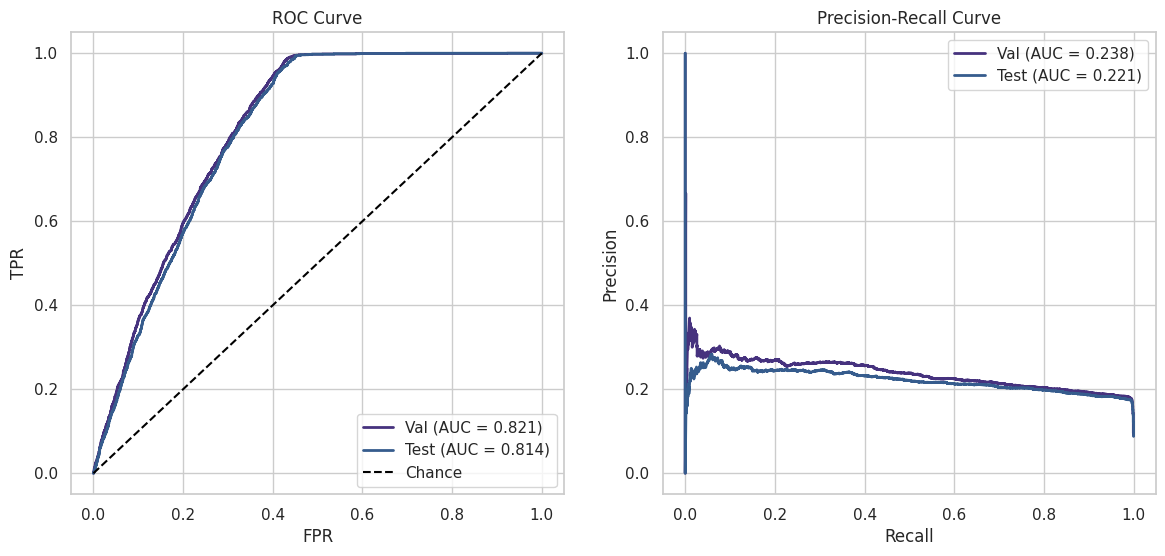

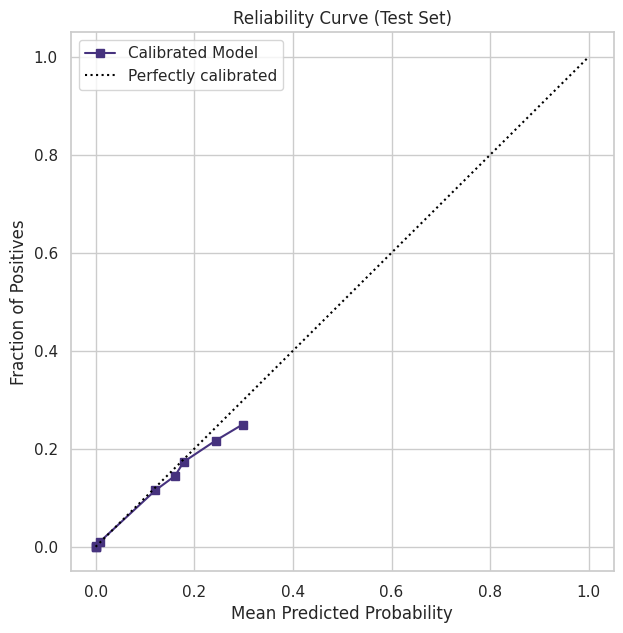

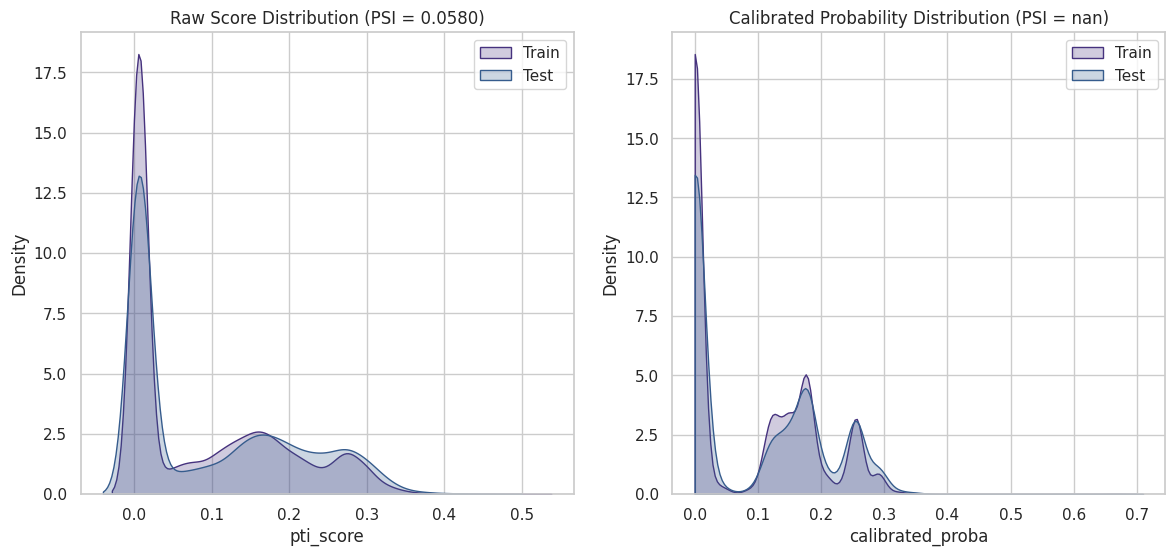

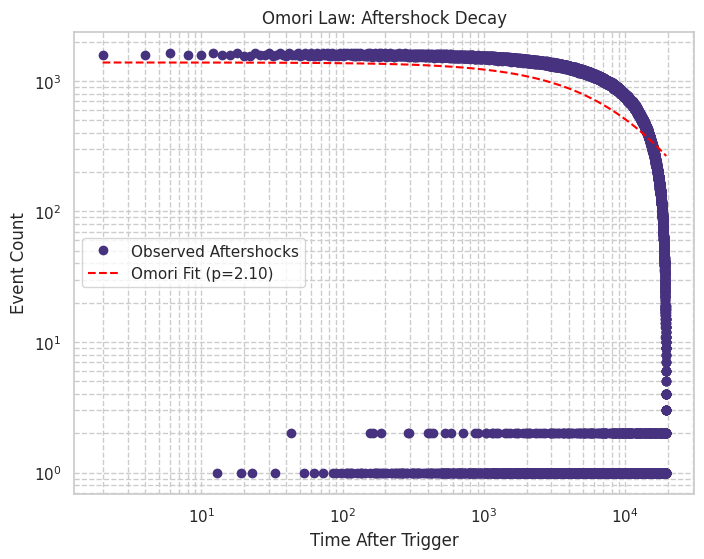


--- Final Metrics Summary (LEAKAGE-FREE MODE) ---
  Test ROC AUC: 0.8138
  Test PR AUC:  0.2211
  Test Brier:   0.0719
  Omori 'p':    2.1021 (Expected ~0.8-2.5)
  PSI (raw):    0.0580

✅✅✅ PATCHED PIPELINE COMPLETED SUCCESSFULLY ✅✅✅


In [116]:
# ==============================================================================
# CELL 13: MAIN PIPELINE EXECUTION - FINAL PATCHED VERSION
# Author: Artem Brezgin, Spanda Foundation (C) October 2025
# ==============================================================================
# This is the master orchestrator cell, updated to use the new "safe" modules
# and corrected import order.
# ==============================================================================

import sys
import yaml
import importlib
import pandas as pd
import numpy as np
import os

# --- 1. Add module path BEFORE imports ---
MODULE_PATH = '/content/qt_causal_pti_lab_modules'
if MODULE_PATH not in sys.path:
    sys.path.append(MODULE_PATH)

# --- 2. Initialize and Reload Safe Modules ---
print("="*80)
print("CAUSAL PTI LABORATORY - PATCHED LEAKAGE-FREE MODE")
print("="*80)

try:
    # Import all necessary modules
    modules_to_load = ['lab_io', 'adapters', 'pti', 'runner', 'metrics', 'viz', 'leakage_guard', 'lab_utils_safe', 'feature_engineering_safe', 'ensemble']
    for mod_name in modules_to_load:
        if mod_name in sys.modules:
            importlib.reload(sys.modules[mod_name])
        else:
            __import__(mod_name)

    from lab_io import load_config, setup_run_environment, save_json
    from adapters import get_adapter
    from runner import SafeWalkForwardRunner
    from metrics import MetricsCalculator
    from viz import Visualizer

    print("✅ All patched modules imported successfully.")
except ImportError as e:
    print(f"🔥 Failed to import modules: {e}")
    raise e

# --- 3. Main Pipeline ---
try:
    # --- Step A: Configuration & Environment ---
    print("\n" + "="*80)
    print("--- Step A: Loading Configuration & Setting up Run Environment ---")
    print("="*80)
    config = load_config('/content/drive/MyDrive/qt_causal_pti_lab/config.yaml')
    run_dir, artifacts_dir, curves_dir = setup_run_environment(config)

    # --- Step B: Data Loading & Splitting ---
    print("\n" + "="*80)
    print("--- Step B: Loading and Splitting Data ---")
    print("="*80)
    adapter = get_adapter(config['data']['domain_adapter'], config['data'])
    point_process_df = adapter.load_and_process()

    # Convert index to numeric for gap calculation if it's Timedelta
    if pd.api.types.is_timedelta64_dtype(point_process_df.index):
        point_process_df.index = point_process_df.index.total_seconds()

    point_process_df.index = pd.to_numeric(point_process_df.index)


    splits_config = config['validation']['splits']
    gap_size = splits_config.get('gap_size', 500)
    train_end_idx = int(len(point_process_df) * splits_config['train_end'])
    val_end_idx = int(len(point_process_df) * splits_config['val_end'])

    train_df = point_process_df.iloc[:train_end_idx].copy()
    val_df = point_process_df.iloc[train_end_idx + gap_size : val_end_idx].copy()
    test_df = point_process_df.iloc[val_end_idx + gap_size :].copy()

    # Reset index to be simple integers for feature engineering functions
    train_df.reset_index(drop=True, inplace=True)
    val_df.reset_index(drop=True, inplace=True)
    test_df.reset_index(drop=True, inplace=True)

    print(f"  Data split: Train={len(train_df)}, Val={len(val_df)}, Test={len(test_df)}")

    # --- Step C: Execute Safe Walk-Forward Validation ---
    print("\n" + "="*80)
    print("--- Step C: Executing Safe Walk-Forward Validation ---")
    print("="*80)
    safe_runner = SafeWalkForwardRunner(config)
    train_results, val_results, test_results = safe_runner.run(train_df, val_df, test_df)

    # --- Step D: Calculate Final Metrics ---
    print("\n" + "="*80)
    print("--- Step D: Calculating Final Metrics ---")
    print("="*80)
    metrics_calculator = MetricsCalculator()
    metrics_dict = metrics_calculator.calculate_all(train_results, val_results, test_results)
    save_json(metrics_dict, os.path.join(artifacts_dir, 'metrics_safe.json'))
    print("\n✅ All metrics calculated and saved.")

    # --- Step E: Generate Visualizations ---
    print("\n" + "="*80)
    print("--- Step E: Generating Visualizations ---")
    print("="*80)
    visualizer = Visualizer(save_dir=curves_dir, dpi=config.get('reporting', {}).get('dpi', 300))
    results_dfs = {'train': train_results, 'val': val_results, 'test': test_results}
    visualizer.plot_all(results_dfs, metrics_dict)

    # --- Step F: Display Final Metrics Summary ---
    print("\n" + "="*80)
    print("--- Final Metrics Summary (LEAKAGE-FREE MODE) ---")
    print("="*80)
    test_metrics = metrics_dict.get('test', {})
    omori_metrics = metrics_dict.get('omori', {})
    drift_metrics = metrics_dict.get('drift', {})

    print(f"  Test ROC AUC: {test_metrics.get('roc_auc', 'N/A'):.4f}")
    print(f"  Test PR AUC:  {test_metrics.get('pr_auc', 'N/A'):.4f}")
    print(f"  Test Brier:   {test_metrics.get('brier_score', 'N/A'):.4f}")
    print(f"  Omori 'p':    {omori_metrics.get('p', np.nan):.4f} (Expected ~0.8-2.5)")
    print(f"  PSI (raw):    {drift_metrics.get('psi_raw_score', np.nan):.4f}")
    if 'comment' in omori_metrics:
        print(f"  Omori Comment: {omori_metrics['comment']}")

    print("\n" + "="*80)
    print("✅✅✅ PATCHED PIPELINE COMPLETED SUCCESSFULLY ✅✅✅")
    print("="*80)

except Exception as e:
    print("\n" + "!"*80)
    print(f"🔥🔥🔥 PIPELINE FAILED: {e}")
    import traceback
    traceback.print_exc()
    print("!"*80)

